# JSON
```
{'first_name': 'Ivan',
 'last_name': 'Smirnov',
 'papers': [
     {'name': 'In search of lost profiles', 'year': 2016},
     {'name': 'Gender bias in sharenting', 'year': 2019}
  ]
}
```

In [1]:
#https://map.cian.ru/ajax/map/roundabout/?deal_type=2&flats=yes&m2=1&currency=2&room2=1&engine_version=2

import time, json, urllib

def get_square(area): 
    url = 'http://map.cian.ru/ajax/map/roundabout/?deal_type=2&flats=yes&m2=1&currency=2&room2=1&engine_version=2&in_polygon[0]='
    coor = str(area[0]) + '_' + str(area[1])
    coor += ',' + str(area[0]) + '_' + str(area[3])
    coor += ',' + str(area[2]) + '_' + str(area[1])
    coor += ',' + str(area[2]) + '_' + str(area[3])
    url += coor
    print(url) 
    time.sleep(0.5)
    content = urllib.request.urlopen(url).read()   
    
    content = json.loads(content.decode("utf-8"))
    return content
    
step_1 = 0.01 
step_2 = 0.02
area = [55.759724 - step_1, 37.640888 - step_2, 55.759724 + step_1, 37.640888 + step_2]
result = get_square(area)


http://map.cian.ru/ajax/map/roundabout/?deal_type=2&flats=yes&m2=1&currency=2&room2=1&engine_version=2&in_polygon[0]=55.749724_37.620887999999994,55.749724_37.660888,55.769724_37.620887999999994,55.769724_37.660888


In [7]:
# Exploring result
result['data']['points'].keys()
for x in result['data']['points']:
    print(x)
    print(result['data']['points'][x]['offers'][0])
    break

55.7694 37.6493
{'published_user_id': 49979226, 'color': '#e1d200', 'link_text': ['2-комн. кв.', '63 м<sup>2</sup>', '26 000 000 р.', 'этаж 8/26', '<a target="_blank" href="https://cian.ru/sale/flat/231409627" title="Перейти на карточку объекта">19 фото</a>'], 'fav': '0', 'price_rur': '26000000.0', 'services': ['paid'], 'property_type': '2', 'id': '231409627'}


(array([45., 31.,  6.,  3.,  0.,  0.,  2.,  1.,  0.,  2.]),
 array([1.225000e+07, 2.882240e+07, 4.539480e+07, 6.196720e+07,
        7.853960e+07, 9.511200e+07, 1.116844e+08, 1.282568e+08,
        1.448292e+08, 1.614016e+08, 1.779740e+08]),
 <a list of 10 Patch objects>)

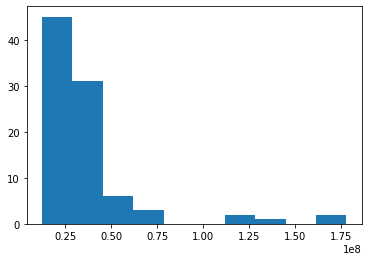

In [8]:
points = result['data']['points']

prices = []

for point in points:
    for offer in points[point]['offers']:        
        prices.append(float(offer['price_rur']))

%matplotlib inline  
from matplotlib import pyplot as plt
plt.hist(prices)

In [ ]:
def load_area(area):
    result = []
    data = get_square(area)

    if (data['status'] == 'toomuch'):
        result = []
        x_mid = (area[2] + area[0]) / 2
        y_mid = (area[3] + area[1]) / 2
        result.extend(load_area([area[0], area[1], x_mid, y_mid]))
        result.extend(load_area([x_mid, area[1], area[2], y_mid]))
        result.extend(load_area([area[0], y_mid, x_mid, area[3]]))
        result.extend(load_area([x_mid, y_mid, area[2], area[3]]))
    else:
        result.append(data)
    return result

# Example

![St Petesburg Heat Map](http://ibsmirnov.com/img/cityheat.png)